# Wallmart 데이터 분석

## 프로젝트 개요
[Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset) 분석 프로젝트입니다. 데이터 전처리, 탐색적 데이터 분석(EDA)을 통한 데이터의 분포를 확인하고, VIP 고객 도출 및 지역별 구매 고객 특징을 파악하여 마케팅 전략을 도출합니다.
이 프로젝트의 목표는 주어진 데이터의 분포를 분석하여 주요 특징을 도출하고, 이를 바탕으로 마케팅 전략을 제시하는 것입니다.

## 데이터 설명
- 데이터 출처: [Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset) 
- 데이터 상세: 약 55만개의 사용자 거래 내역과 10개의 특징(550068, 10)
  - `User_ID`: User ID
  - `Product_ID`: Product ID
  - `Gender`: Sex of User
  - `Age`: Age in bins
  - `Occupation`: Occupation(Masked)
  - `City_Category`: Category of the City (A,B,C)
  - `StayInCurrentCityYears`: Number of years stay in current city
  - `Marital_Status`: Marital Status
  - `ProductCategory`: Product Category (Masked)
  - `Purchase`: Purchase Amount


# 데이터 불러오기

In [6]:
import matplotlib.pyplot as plt


In [1]:
import pandas as pd

df = pd.read_csv('data/walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# EDA

In [ ]:
# 전체 데이터가 몇 개 있는것인가?  
df.shape

(550068, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


결측치는 확인되지 않았습니다.

총 550,068 건의 데이터를 대상으로 분석을 수행했습니다.

In [3]:
# 몇명의 고객 정보인가?
# User-id 갯수
df['User_ID'].nunique()

5891

총 5,891명의 사용자 거래 내역이 담겨 있습니다.

In [4]:
# 고객의 분포
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

26~35세 연령대의 고객이 가장 많이 방문했습니다.

In [ ]:
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
t_feature = df['Age'].value_counts().reindex(age_group)
t_feature

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: count, dtype: int64

<BarContainer object of 7 artists>

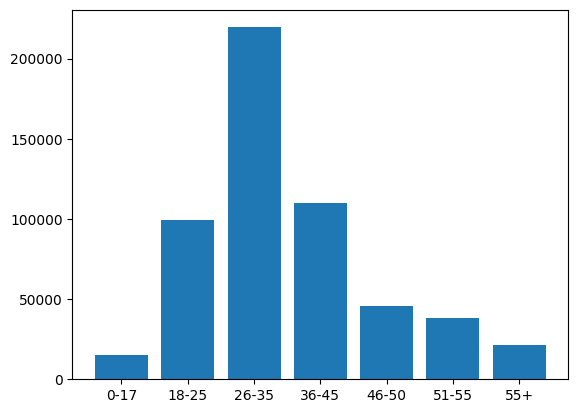

In [ ]:

plt.bar(t_feature.index,t_feature.values)

26~35세 연령대가 22만명 이상으로 경제활동이 활발한 소비 주도층이 주요 타깃 고객군일 가능성이 높습니다.<br>
18~25세와 36~45세 연령대가 안정적인 고객군으로 판단됩니다.<br>
10대의 경우 보호자 동반 방문으로 직접 방문하는 고객층의 패턴을 확인할 필요가 있습니다.<br>
50대 이상의 경우 구매력에 비해 방문횟수가 적어, 마케팅 강화의 여지를 확인할 필요가 있습니다.<br>

(array([4.2130e+03, 7.1170e+03, 3.2500e+03, 1.1013e+04, 1.1251e+04,
        4.0310e+03, 6.3480e+03, 2.1116e+04, 1.5957e+04, 1.0467e+04,
        1.7035e+04, 2.5178e+04, 3.3914e+04, 1.8370e+03, 5.4311e+04,
        5.6880e+03, 5.6779e+04, 1.5139e+04, 2.6374e+04, 9.3800e+02,
        3.4995e+04, 2.0870e+03, 6.8650e+03, 8.0510e+03, 2.4786e+04,
        1.1461e+04, 7.2560e+03, 7.9490e+03, 3.0450e+03, 4.6700e+02,
        5.1200e+02, 1.1508e+04, 2.9743e+04, 1.3926e+04, 8.8690e+03,
        2.1880e+03, 3.4400e+02, 2.0000e+01, 7.6000e+02, 9.3830e+03,
        1.8225e+04, 3.9700e+03, 5.5140e+03, 2.9240e+03, 9.0600e+02,
        8.0000e+00, 0.0000e+00, 3.5000e+01, 1.1540e+03, 1.1610e+03]),
 array([1.200000e+01, 4.909800e+02, 9.699600e+02, 1.448940e+03,
        1.927920e+03, 2.406900e+03, 2.885880e+03, 3.364860e+03,
        3.843840e+03, 4.322820e+03, 4.801800e+03, 5.280780e+03,
        5.759760e+03, 6.238740e+03, 6.717720e+03, 7.196700e+03,
        7.675680e+03, 8.154660e+03, 8.633640e+03, 9.112620e+03

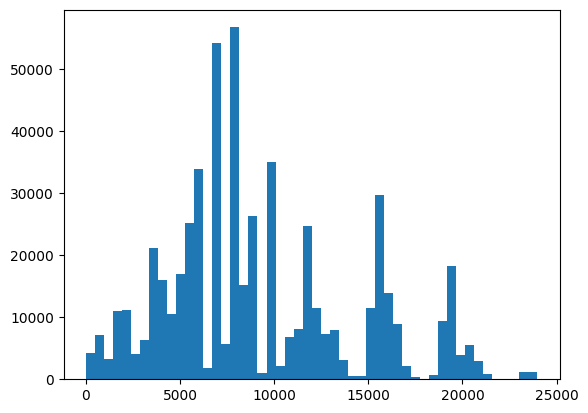

In [16]:
#구매한 제품의 가격대를 분석
plt.hist(df['Purchase'], bins=50)

In [17]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
#상위 1% 가격의 구매제품 목록 - 이상치 확인
high_outlier = df['Purchase'].quantile(0.99)
high_prc_prod = df[df['Purchase']>high_outlier]
high_prc_prod.shape

(5492, 10)

In [21]:
high_prc_prod.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
234,1000043,P00255842,M,26-35,12,A,0,0,16,20961
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
731,1000139,P00020142,F,26-35,20,C,2,0,7,21002


In [22]:
# 고가 전략 제품으로 카테고리 분석
high_prc_prod['Product_Category'].value_counts()

Product_Category
10    2275
15    1590
16     694
7      645
6      213
9       75
Name: count, dtype: int64

10, 15, 16, 7번 카테고리 순으로 구매가 집중되고 있습니다.<BR>
해당 제품을 확인하여, 고부가가치 상품군이 존재할 가능성을 확인할 필요가 있습니다.<BR>

In [ ]:
#저가 제품의 카테고리 집중도
